# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5, ))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

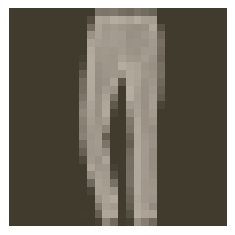

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
from torch import nn
from torch import optim
  
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)) 

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)


## Test criterion
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels); 
print(loss) 

tensor(2.3001, grad_fn=<NllLossBackward>)


In [5]:
# TODO: Train the network here
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        output = model(images)
        loss = criterion(output, labels)
        
        # TODO: Training pass  
        optimizer.zero_grad() 
         
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5154702279136888
Training loss: 0.38747784064840407
Training loss: 0.35624376540658065
Training loss: 0.3291641251761903
Training loss: 0.3123171758661265
Training loss: 0.2996906648074259
Training loss: 0.28904839717090003
Training loss: 0.27892913042641143
Training loss: 0.269457121425346
Training loss: 0.2622277909464864
Training loss: 0.25703709268334834
Training loss: 0.245390358208212
Training loss: 0.24379226472427343
Training loss: 0.2359933204599408
Training loss: 0.23484007051504496
Training loss: 0.22990110864850885
Training loss: 0.22265501710365831
Training loss: 0.2168381311245628
Training loss: 0.21806465145319637
Training loss: 0.21315793111237255


Iter 0 : Accurate
Iter 1 : Accurate
Iter 2 : Accurate
Iter 3 : Accurate
Iter 4 : Accurate
Iter 5 : Accurate
Iter 6 : Wrong
Iter 7 : Accurate
Iter 8 : Wrong
Iter 9 : Accurate
Iter 10 : Accurate
Iter 11 : Accurate
Iter 12 : Accurate
Iter 13 : Accurate
Iter 14 : Accurate
Iter 15 : Accurate
Iter 16 : Accurate
Iter 17 : Accurate
Iter 18 : Accurate
Iter 19 : Wrong
Iter 20 : Accurate
Iter 21 : Accurate
Iter 22 : Accurate
Iter 23 : Accurate
Iter 24 : Accurate
Iter 25 : Accurate
Iter 26 : Wrong
Iter 27 : Accurate
Iter 28 : Accurate
Iter 29 : Accurate
Iter 30 : Accurate
Iter 31 : Accurate
Iter 32 : Wrong
Iter 33 : Accurate
Iter 34 : Accurate
Iter 35 : Accurate
Iter 36 : Accurate
Iter 37 : Accurate
Iter 38 : Accurate
Iter 39 : Wrong
Iter 40 : Accurate
Iter 41 : Accurate
Iter 42 : Wrong
Iter 43 : Accurate
Iter 44 : Accurate
Iter 45 : Accurate
Iter 46 : Accurate
Iter 47 : Accurate
Iter 48 : Accurate
Iter 49 : Accurate
Iter 50 : Accurate
Iter 51 : Accurate
Iter 52 : Accurate
Iter 53 : Accurate
Iter 

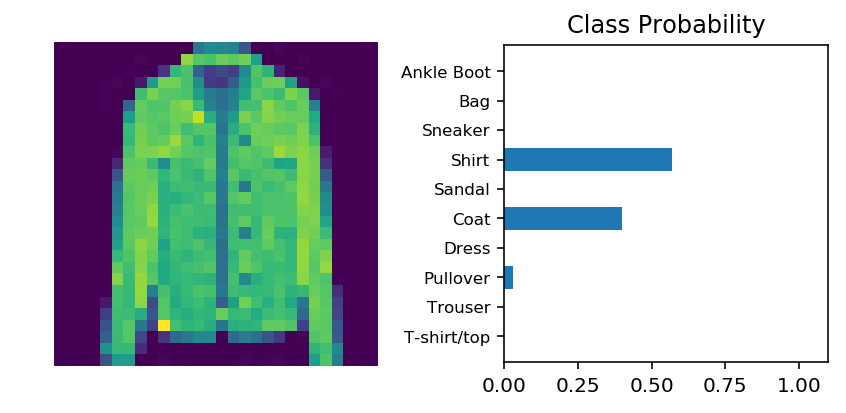

In [66]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
predicted_label = torch.zeros(len(labels), dtype=torch.long) 
counter = 0
with torch.no_grad():
    for iteration, (img, label) in enumerate(zip(images,labels)): 
        # Convert 2D image to 1D vector
        img = img.resize_(1, 784)

        # TODO: Calculate the class probabilities (softmax) for img
        logps = model(img)

        # Output of the network are log-probabilities, need to take exponential for probabilities
        ps = torch.exp(logps) 
        predicted_label[iteration] = ps.argmax()
        if label == ps.argmax():
            print('Iter %d : Accurate' % (iteration)  )
            counter = counter +1
        else:
            print('Iter %d : Wrong' % (iteration)  )
        # Plot the image and probabilities

helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
print('Hit Rate %f' % (np.divide(counter,len(labels))))

from sklearn.metrics import f1_score

pred_labels = np.array(predicted_label)
gt_labels =  np.array(labels) 
F1_scores = f1_score(gt_labels, pred_labels, average='weighted')  

print('F1-scores %f' % (F1_scores))

In [62]:
np.array(predicted_label)

array([3, 7, 0, 8, 3, 3, 5, 8, 5, 7, 3, 1, 4, 3, 6, 8, 7, 4, 5, 6, 2, 0,
       2, 7, 9, 7, 9, 2, 3, 2, 0, 8, 7, 5, 9, 3, 0, 3, 8, 7, 9, 2, 2, 0,
       3, 8, 6, 7, 2, 7, 7, 4, 8, 7, 2, 3, 9, 1, 5, 7, 8, 7, 2, 5],
      dtype=int64)

In [63]:
np.array(labels) 

array([3, 7, 0, 8, 3, 3, 5, 8, 5, 7, 3, 1, 4, 0, 6, 8, 7, 4, 5, 6, 2, 0,
       2, 7, 9, 7, 9, 2, 3, 2, 0, 8, 7, 5, 9, 3, 0, 4, 8, 7, 9, 2, 2, 0,
       3, 8, 6, 7, 6, 7, 7, 4, 8, 7, 4, 3, 9, 1, 5, 7, 8, 7, 3, 5],
      dtype=int64)

In [60]:
counter

60

In [23]:
np.array([ps.argmax()])

array([1], dtype=int64)

tensor(1)

In [25]:
ps.argmax()

tensor(1)